# Exploratory Data Analysis

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\C DAC\python\Project\Data\data_transform.csv")

## Removing unwanted Rows (Where city is not defined or multiple cities for one opening)

In [3]:
def filt_loc(x):
    if len(x.split())>2:
        return "Not Required"
    else:
        return x

def filt_loc2(x):
    if len(x.split('+'))>1:
        return "Not Required"
    else:
        return x

df['Location']=df['Location'].apply(filt_loc)
df['Location']=df['Location'].apply(filt_loc2)

df=df[df['Location']!='Not Required']
df=df[df['Location']!='Not Defined']
df=df[df['Location']!='All India']


## City wise analysis of job opening

In [4]:
city=df.groupby('Location',as_index=False).sum().sort_values(by=['Number of opening'],ascending=False)

In [5]:
city=df.groupby('Location',as_index=False).sum().sort_values(by=['Number of opening'],ascending=False).head(10)

## Top 10 city with highest job opening

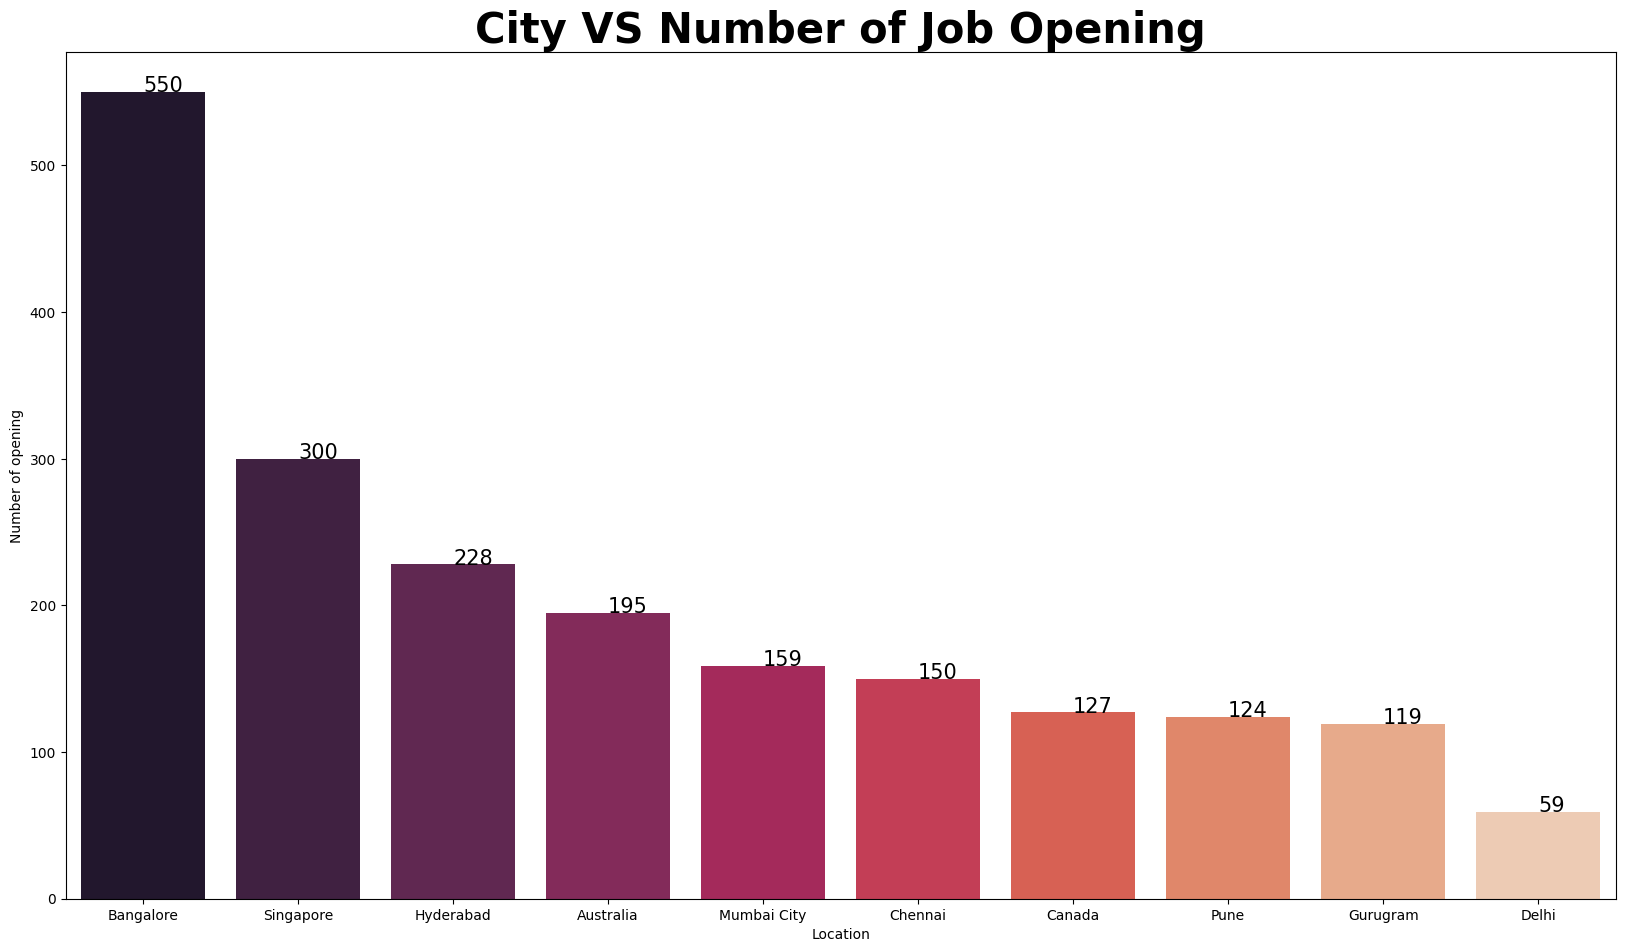

In [7]:
sns.barplot(data=city,x=city['Location'],y=city['Number of opening'],palette='rocket').set_title('City VS Number of Job Opening', fontdict={'size': 30, 'weight': 'bold','family':"sans-serif"})
plt.rcParams['figure.figsize']=(20,11)
for index,value in enumerate(city['Number of opening']):
    plt.text(index,value,str(value),fontsize = 15)
plt.show()

## Company wise analysis of job opening

In [12]:
company=df.groupby('Company Name',as_index=False).sum().sort_values(by=['Number of opening'],ascending=False).head(10)

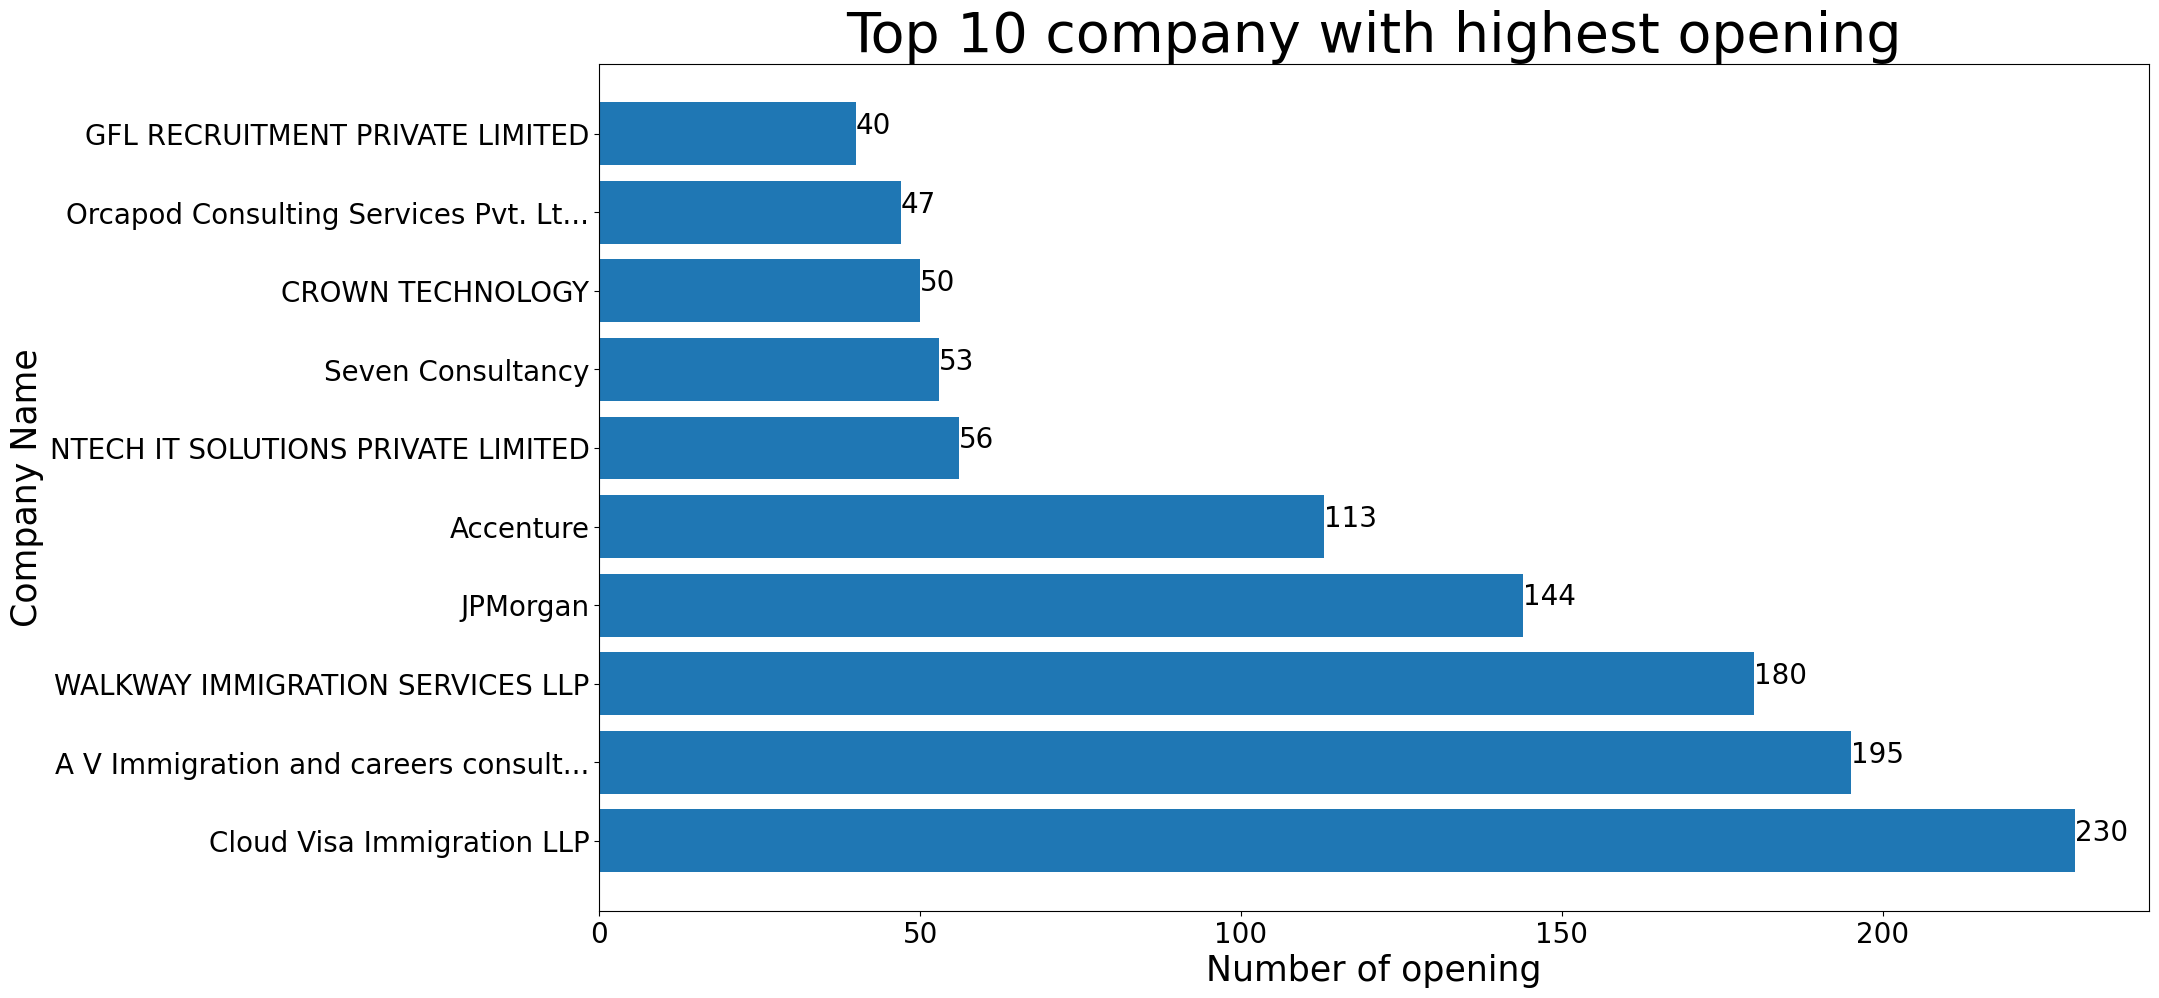

In [13]:
plt.barh(company['Company Name'],company['Number of opening'])
plt.ylabel('Company Name',fontsize=25)
plt.xlabel('Number of opening',fontsize=25)
plt.title("Top 10 company with highest opening",fontsize=40)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

for index,value in enumerate(company['Number of opening']):
    plt.text(value,index,str(value),fontsize = 20)
plt.show()

# Category wise job opening analysis

In [14]:
position=df.groupby('Job Category',as_index=False).sum().sort_values(by=['Number of opening'],ascending=False)

In [15]:
position

,Job Category,Job Title,Company Name,Exp,Number of opening,Location,Link
1,Data Analyst,Consultant - Data Analyst - Data AnalyticsData...,Pylon Management ConsultingArminusGFL RECRUITM...,841,856,BangaloreGurugramMumbai CitySuratChennaiDelhiH...,https://www.shine.com/jobs/consultant-data-ana...
2,Data Engineer,Data Engineer Business IntelligenceData Engine...,IBM India Pvt. LimitedIBM India Pvt. LimitedMe...,1422,546,GurugramMumbai CityBangaloreBangaloreBangalore...,https://www.shine.com/jobs/data-engineer-busin...
4,Other,Requirement for Data Developer / Architect (Da...,NTT Global Delivery Services Limite...Citibank...,1624,534,BangalorePuneBangaloreDelhiBangaloreHyderabadP...,https://www.shine.com/jobs/requirement-for-dat...
5,Python Developer,Python Developer - SQL/ConfluenceUrgent Applic...,Episeio Business SolutionsAsvatthah Consultant...,401,205,Mumbai CityChennaiBangalorePuneBangaloreBangal...,https://www.shine.com/jobs/python-developer-sq...
3,Data Scientist,Wealth Management Data Scientist AssociateData...,JPMorganJPMorganHEREHuquoJPMorganSeven Consult...,491,108,BangaloreBangaloreMumbai CityHyderabadBangalor...,https://www.shine.com/jobs/wealth-management-d...
0,Business Analyst,Opening for Business Analyst- Market Data Time...,PES HR ServicesAmazonAmazonTechno SciencePlane...,110,33,Mumbai CityBangaloreBangaloreBangaloreGurugram...,https://www.shine.com/jobs/opening-for-busines...


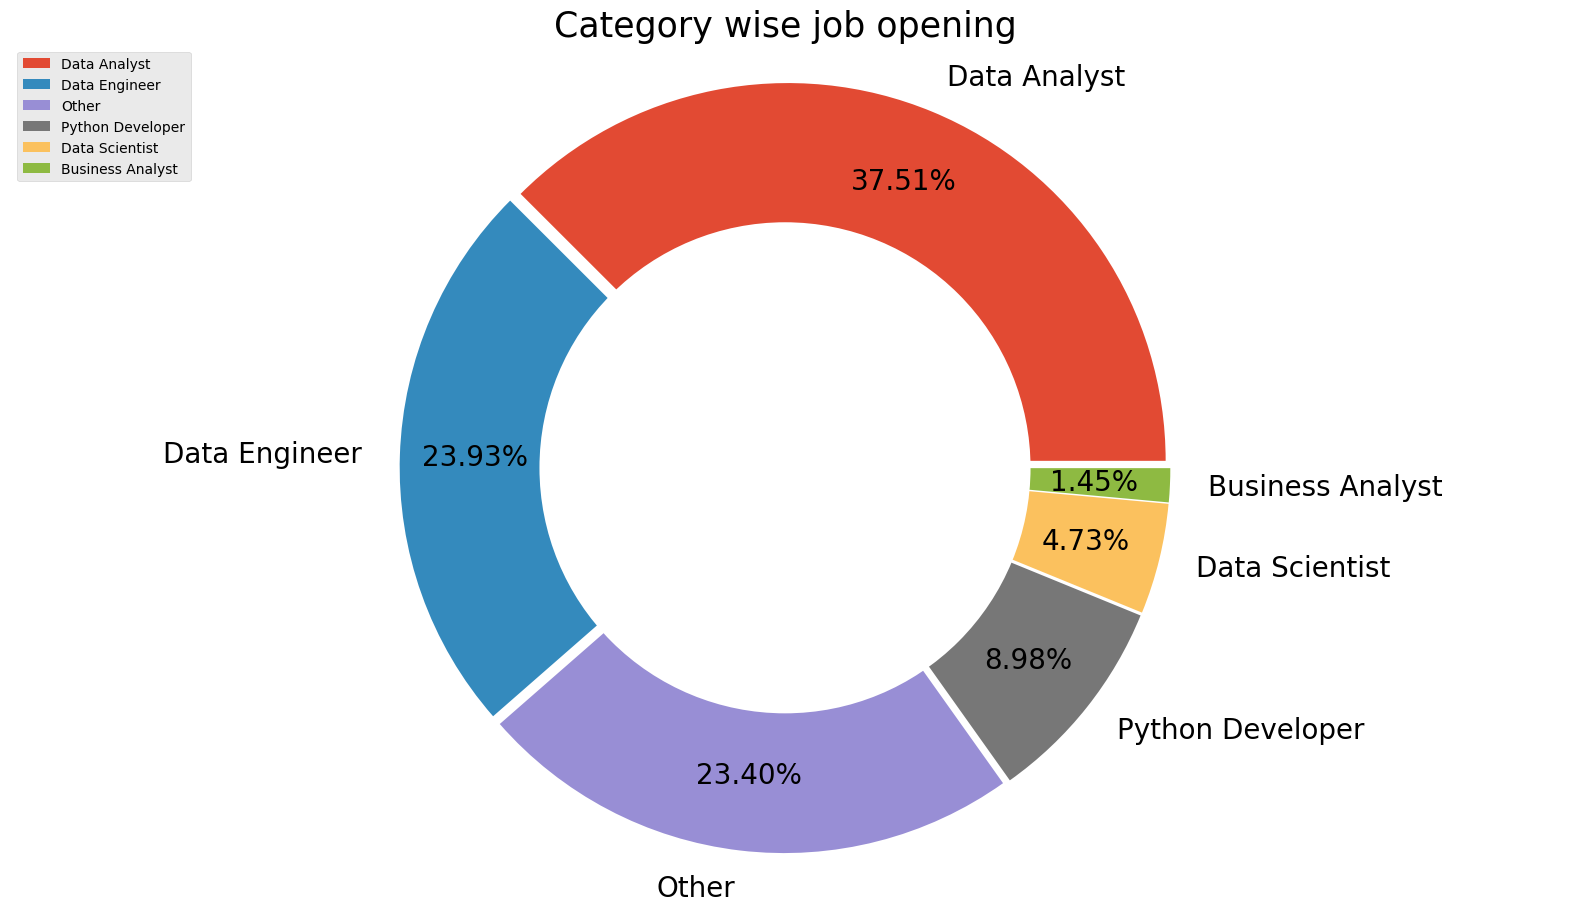

In [16]:
ex=[]
for i in position['Job Category']:
    ex.append(0.02)
    
plt.style.use('ggplot')
plt.title('Category wise job opening',fontsize=25)
plt.pie(x=position['Number of opening'],labels=position['Job Category'],autopct='%.2f%%',shadow=False,textprops={'fontsize':20},
       pctdistance=0.80,explode=ex)
plt.axis('equal')
plt.legend(loc='upper left')
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

# Experienc wise Job opening analysis

In [17]:
Ex=df.groupby('Exp',as_index=False).sum().sort_values(by=['Exp'],ascending=True)

In [18]:
Ex

,Exp,Job Title,Company Name,Number of opening,Location,Link,Job Category
0,0,Data analyst / Data scientistData AnalystData ...,GFL RECRUITMENT PRIVATE LIMITEDPleasant Inc.SB...,149,Mumbai CitySuratChennaiMumbai CityBangaloreThi...,https://www.shine.com/jobs/data-analyst-data-s...,Data AnalystData AnalystData AnalystData Analy...
1,1,Python DeveloperPython DeveloperGalytix Analyt...,e Zest Solutions LimitedTejas SystemsGalytix A...,121,PuneBangaloreGurugramFatehgarh SahibMumbai Cit...,https://www.shine.com/jobs/python-developer-pe...,Python DeveloperPython DeveloperData AnalystDa...
2,2,Urgent Applicants for Python Developer - Flask...,Asvatthah Consultant FirmArminusJPMorganMerced...,728,ChennaiGurugramBangaloreBangaloreBangaloreHyde...,https://www.shine.com/jobs/urgent-applicants-f...,Python DeveloperData AnalystData ScientistData...
3,3,Data Engineer - AzureUrgent looking for Big d...,MercedeCitibank India.HuquoAngel and GenieSeve...,241,BangaloreChennaiHyderabadBangaloreHyderabadBan...,https://www.shine.com/jobs/data-engineer-azure...,Data EngineerData EngineerData ScientistData E...
4,4,Consultant - Data Analyst - Data AnalyticsData...,Pylon Management ConsultingIBM India Pvt. Limi...,294,BangaloreGurugramMumbai CityBangaloreBangalore...,https://www.shine.com/jobs/consultant-data-ana...,Data AnalystData EngineerData EngineerData Sci...
5,5,Python Developer - SQL/ConfluencePython Develo...,Episeio Business SolutionsJPMorganArminusJPMor...,274,Mumbai CityBangaloreKolkataBangaloreBangaloreB...,https://www.shine.com/jobs/python-developer-sq...,Python DeveloperPython DeveloperData EngineerD...
6,6,MB.OS- Gen6 Minerva-Stochastic Python develope...,MercedeSkyleaf ConsultantsSkyleaf ConsultantsS...,110,BangaloreNoidaNoidaNoidaBangaloreBangaloreMumb...,https://www.shine.com/jobs/mbos-gen6-minerva-s...,Python DeveloperData EngineerData EngineerData...
7,7,Lead Data ScientistLead Data Engineer - ITData...,HEREPraaxis Consultants Pvt. LtdAcura Solution...,67,Mumbai CityBangaloreNoidaBangaloreBangaloreGur...,https://www.shine.com/jobs/lead-data-scientist...,Data ScientistData EngineerData ScientistPytho...
8,8,Data ScientistImmediate Hiring for Software En...,TalentOne Consulting Pvt LtdJPMorganSeven Cons...,78,BangaloreBangaloreHyderabadMumbai CityHyderaba...,https://www.shine.com/jobs/data-scientist-perm...,Data ScientistData EngineerData ScientistData ...
9,9,Data AnalystApply for Lead Data EngineerVice P...,Orcapod Consulting Services Pvt. Lt...Recruise...,7,BangaloreBangaloreBangaloreBangaloreBangaloreG...,https://www.shine.com/jobs/data-analyst-perman...,Data AnalystData EngineerData ScientistOtherOt...


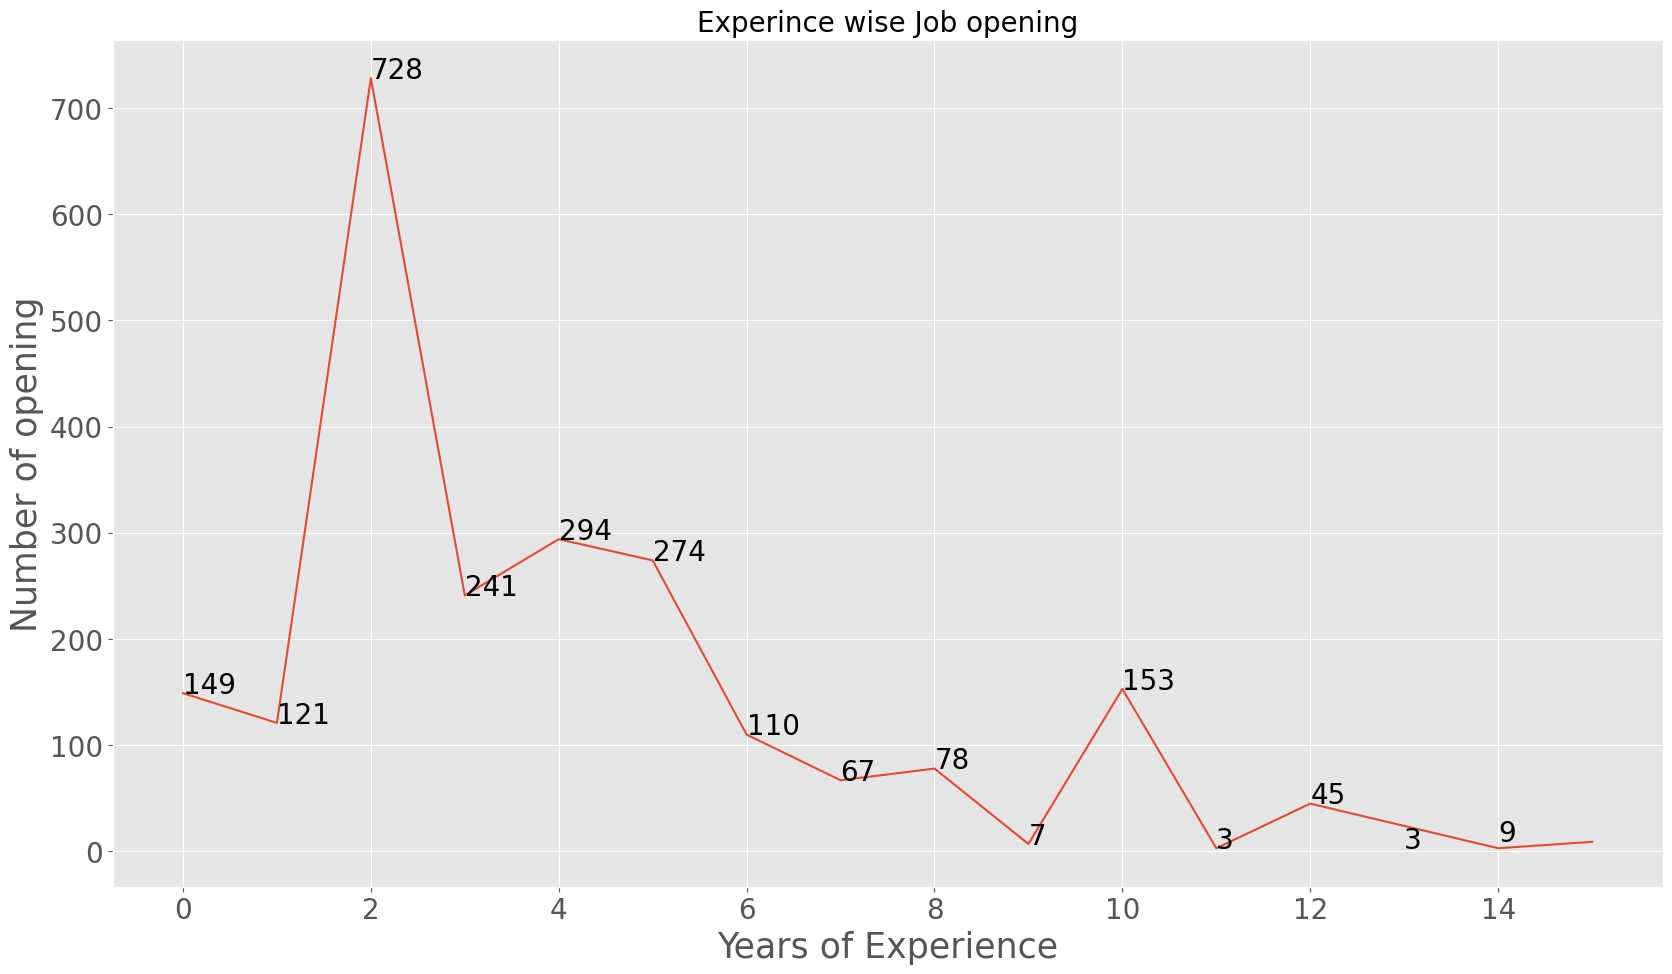

In [19]:

plt.plot(Ex['Exp'],Ex['Number of opening'])
plt.ylabel('Number of opening',fontsize=25)
plt.xlabel('Years of Experience',fontsize=25)
plt.title("Experince wise Job opening",fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
for index,value in enumerate(Ex['Number of opening']):
    plt.text(index,value,str(value),fontsize = 20)
plt.show()
plt.show()
# plt.show()